# Procesamiento de los archivos que muestran: Zonas de Riesgo de Tizon Tardio.



## Importamos bibliotecas para visualizacion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2014

In [16]:
# Cargar el archivo ASCII
TizonTardio_2014 = np.loadtxt('/content/sample_data/S_2014.asc', skiprows=6)  # Asegúrate de que esta sea la ruta correcta


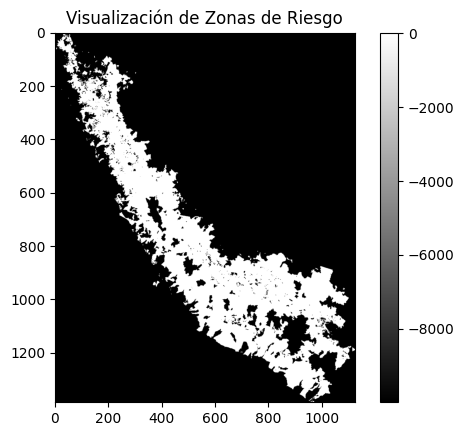

In [17]:
# Visualizar los datos
plt.imshow(TizonTardio_2014, cmap='gray')
plt.colorbar()
plt.title('Visualización de Zonas de Riesgo')
plt.show()

## 2015

In [18]:
# Cargar el archivo ASCII
TizonTardio_2015 = np.loadtxt('/content/sample_data/S_2015.asc', skiprows=6)  # Asegúrate de que esta sea la ruta correcta

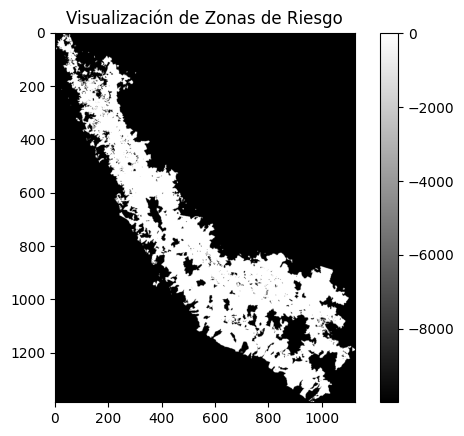

In [19]:
# Visualizar los datos
plt.imshow(TizonTardio_2015, cmap='gray')
plt.colorbar()
plt.title('Visualización de Zonas de Riesgo')
plt.show()

## 2016

In [20]:
# Cargar el archivo ASCII
TizonTardio_2016 = np.loadtxt('/content/sample_data/S_2016.asc', skiprows=6)  # Asegúrate de que esta sea la ruta correcta

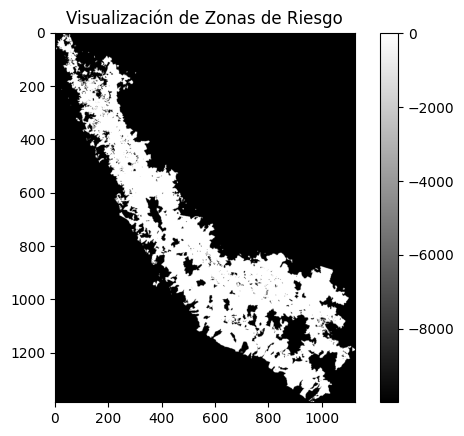

In [21]:
# Visualizar los datos
plt.imshow(TizonTardio_2015, cmap='gray')
plt.colorbar()
plt.title('Visualización de Zonas de Riesgo')
plt.show()

# Procesamiento para pasarlo a dep-prov-dist

In [22]:
# Instalar las bibliotecas necesarias si no están instaladas
!pip install geopandas numpy matplotlib

In [2]:
# Importar las bibliotecas
import geopandas as gpd
import numpy as np

# Ruta de los archivos
ruta_geojson = '/content/sample_data/distritos-peru@bogota-laburbano.geojson'
ruta_asc_2014 = '/content/sample_data/S_2014.asc'
ruta_asc_2015 = '/content/sample_data/S_2015.asc'
ruta_asc_2016 = '/content/sample_data/S_2016.asc'

# Cargar el archivo GeoJSON
distritos = gpd.read_file(ruta_geojson)

# Cargar los archivos ASCII
tizon_2014 = np.loadtxt(ruta_asc_2014, skiprows=6)
tizon_2015 = np.loadtxt(ruta_asc_2015, skiprows=6)
tizon_2016 = np.loadtxt(ruta_asc_2016, skiprows=6)

# Mostrar información básica
print("Primeras filas del archivo GeoJSON:")
print(distritos.head())

print("Dimensiones del archivo S_2014.asc:", tizon_2015.shape)

Primeras filas del archivo GeoJSON:
                                        geo_point_2d ccdd     nombdep ccpp  \
0  { "lon": -78.917689300700005, "lat": -7.364304...   06   CAJAMARCA   05   
1  { "lon": -78.873085214, "lat": -7.159047929969...   06   CAJAMARCA   12   
2  { "lon": -79.671300957300005, "lat": -7.014424...   14  LAMBAYEQUE   01   
3  { "lon": -79.857484568700002, "lat": -6.865730...   14  LAMBAYEQUE   01   
4  { "lon": -79.506682101300001, "lat": -6.888700...   14  LAMBAYEQUE   01   

    nombprov ccdi  nombdist          capital  ubigeo idprov  codigo  cnt_ccpp  \
0  CONTUMAZA   04  GUZMANGO         GUZMANGO  060504   0605  060504        50   
1  SAN PABLO   03  SAN LUIS  SAN LUIS GRANDE  061203   0612  061203         9   
2   CHICLAYO   07   LAGUNAS           MOCUPE  140107   1401  140107        27   
3   CHICLAYO   08   MONSEFU          MONSEFU  140108   1401  140108        44   
4   CHICLAYO   16   CAYALTI          CAYALTI  140116   1401  140116        18   

  descri

In [3]:
# Verificar el CRS del archivo GeoJSON
print("CRS del archivo GeoJSON:", distritos.crs)

# Calcular la extensión (bounding box) de los distritos en el GeoJSON
geojson_bounds = distritos.total_bounds  # [xmin, ymin, xmax, ymax]
print("Extensión del archivo GeoJSON (en lat/lon):", geojson_bounds)

# Mostrar la latitud/longitud mínima y máxima del archivo S_2014.asc
# Asumimos que el archivo .asc tiene un header con información de coordenadas
with open(ruta_asc_2014, 'r') as file:
    for _ in range(6):  # Leer las primeras 6 líneas del encabezado
        print(next(file).strip())


CRS del archivo GeoJSON: EPSG:4326
Extensión del archivo GeoJSON (en lat/lon): [-8.13282305e+01 -1.83509277e+01 -6.86522791e+01 -3.86059690e-02]
NCOLS 1125
NROWS 1386
XLLCORNER -80.065
YLLCORNER -18.2949999999972
CELLSIZE 0.00999999999999091
NODATA_value -9999


In [4]:
# Definir las variables basadas en el encabezado del archivo .asc
XLLCORNER = -80.065
YLLCORNER = -18.2949999999972
CELLSIZE = 0.00999999999999091
NODATA_value = -9999
NCOLS = 1125
NROWS = 1386

# Crear arrays con las coordenadas de las filas (latitudes) y columnas (longitudes)
asc_latitudes = np.linspace(
    YLLCORNER + CELLSIZE * (NROWS - 1),  # Máxima latitud (fila superior)
    YLLCORNER,  # Mínima latitud (fila inferior)
    NROWS
)

asc_longitudes = np.linspace(
    XLLCORNER,  # Mínima longitud (columna izquierda)
    XLLCORNER + CELLSIZE * (NCOLS - 1),  # Máxima longitud (columna derecha)
    NCOLS
)

# Mostrar las primeras y últimas coordenadas de latitud y longitud
print("Latitudes (primeras y últimas):", asc_latitudes[:5], asc_latitudes[-5:])
print("Longitudes (primeras y últimas):", asc_longitudes[:5], asc_longitudes[-5:])


Latitudes (primeras y últimas): [-4.445 -4.455 -4.465 -4.475 -4.485] [-18.255 -18.265 -18.275 -18.285 -18.295]
Longitudes (primeras y últimas): [-80.065 -80.055 -80.045 -80.035 -80.025] [-68.865 -68.855 -68.845 -68.835 -68.825]


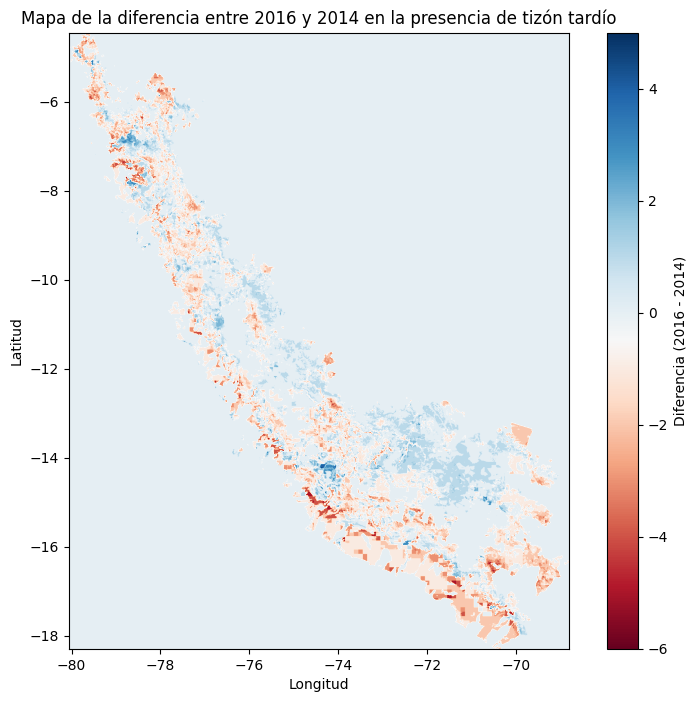

In [6]:
import matplotlib.pyplot as plt

# Calcular la diferencia entre los archivos .asc (2016 - 2014)
diferencia_asc = tizon_2016 - tizon_2014

# Crear un mapa para visualizar la diferencia
plt.figure(figsize=(10, 8))
plt.imshow(
    diferencia_asc, cmap='RdBu',
    extent=[asc_longitudes.min(), asc_longitudes.max(), asc_latitudes.min(), asc_latitudes.max()]
)
plt.colorbar(label='Diferencia (2016 - 2014)')
plt.title('Mapa de la diferencia entre 2016 y 2014 en la presencia de tizón tardío')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [7]:
import pandas as pd
from shapely.geometry import Point

# Identificar las coordenadas de las celdas con mayores diferencias
umbral_diferencia = np.max(diferencia_asc)  # Máxima diferencia
coords_diferencia_alta = np.where(diferencia_asc == umbral_diferencia)

# Crear una lista de puntos con latitud y longitud
puntos_diferencia = [
    Point(asc_longitudes[j], asc_latitudes[i])  # Convertir a coordenadas geográficas
    for i, j in zip(coords_diferencia_alta[0], coords_diferencia_alta[1])
]

# Verificar a qué distritos pertenecen estos puntos
distritos_afectados = []

for punto in puntos_diferencia:
    for idx, row in distritos.iterrows():
        if row['geometry'].contains(punto):
            distritos_afectados.append({
                'Departamento': row['nombdep'],
                'Provincia': row['nombprov'],
                'Distrito': row['nombdist'],
                'Latitud': punto.y,
                'Longitud': punto.x,
                'Diferencia': umbral_diferencia
            })

# Convertir los resultados en un DataFrame
df_distritos_afectados = pd.DataFrame(distritos_afectados)

# Mostrar los resultados
print(df_distritos_afectados)

# Guardar los resultados en un archivo CSV
df_distritos_afectados.to_csv('/content/distritos_cambios_dramaticos.csv', index=False)
print("Resultados guardados en distritos_cambios_dramaticos.csv")


   Departamento Provincia            Distrito  Latitud  Longitud  Diferencia
0      AYACUCHO   LUCANAS  SAN PEDRO DE PALCO  -14.215   -74.385         5.0
1      AYACUCHO   LUCANAS              AUCARA  -14.215   -74.375         5.0
2      AYACUCHO   LUCANAS  SAN PEDRO DE PALCO  -14.225   -74.395         5.0
3      AYACUCHO   LUCANAS  SAN PEDRO DE PALCO  -14.225   -74.385         5.0
4      AYACUCHO   LUCANAS  SAN PEDRO DE PALCO  -14.225   -74.375         5.0
5      AYACUCHO   LUCANAS       SAN CRISTOBAL  -14.765   -74.305         5.0
6      AYACUCHO   LUCANAS       SAN CRISTOBAL  -14.765   -74.295         5.0
7      AYACUCHO   LUCANAS       SAN CRISTOBAL  -14.765   -74.285         5.0
8      AYACUCHO   LUCANAS       SAN CRISTOBAL  -14.765   -74.275         5.0
9      AYACUCHO   LUCANAS       SAN CRISTOBAL  -14.775   -74.305         5.0
10     AYACUCHO   LUCANAS       SAN CRISTOBAL  -14.775   -74.295         5.0
11     AYACUCHO   LUCANAS       SAN CRISTOBAL  -14.775   -74.285         5.0

In [12]:
from shapely.geometry import box

# Seleccionar el distrito "SAN CRISTÓBAL" en la provincia de Lucanas, Ayacucho
distrito_seleccionado = distritos[
    (distritos['nombdist'] == 'SAN CRISTOBAL') &
    (distritos['nombprov'] == 'LUCANAS') &
    (distritos['nombdep'] == 'AYACUCHO')
]

# Extraer la geometría del distrito seleccionado
if not distrito_seleccionado.empty:
    geometria_distrito = distrito_seleccionado.iloc[0]['geometry']
    print("Geometría del distrito seleccionada correctamente.")
else:
    print("No se encontró el distrito seleccionado. Verifica los nombres.")


Geometría del distrito seleccionada correctamente.


In [17]:
from shapely.vectorized import contains

# Crear mallas 2D con las coordenadas de cada celda
lon_grid, lat_grid = np.meshgrid(asc_longitudes, asc_latitudes)

# Crear una máscara booleana para identificar las celdas dentro del distrito
mask = contains(geometria_distrito, lon_grid, lat_grid)

# Extraer las coordenadas de las celdas que están dentro del distrito
celdas_distrito = np.column_stack(np.where(mask))

# Mostrar la cantidad de celdas dentro del distrito
print(f"Total de celdas dentro del distrito: {len(celdas_distrito)}")


Total de celdas dentro del distrito: 343


In [24]:
# Calcular un indicador de presencia del tizón basado en la suma de valores no nulos
indicador_2014 = np.sum(np.where(tizon_2014[mask] == NODATA_value, 0, tizon_2014[mask]))
indicador_2015 = np.sum(np.where(tizon_2015[mask] == NODATA_value, 0, tizon_2015[mask]))
indicador_2016 = np.sum(np.where(tizon_2016[mask] == NODATA_value, 0, tizon_2016[mask]))

# Verificar los valores de las celdas para cada año
valores_2014 = np.where(tizon_2014[mask] == NODATA_value, 0, tizon_2014[mask])
valores_2015 = np.where(tizon_2015[mask] == NODATA_value, 0, tizon_2015[mask])
valores_2016 = np.where(tizon_2016[mask] == NODATA_value, 0, tizon_2016[mask])

# Recalcular el porcentaje basado en el total del indicador
porcentaje_tizon_2014 = (indicador_2014 / (343 * np.max(valores_2014))) * 100
porcentaje_tizon_2015 = (indicador_2015 / (343 * np.max(valores_2015))) * 100
porcentaje_tizon_2016 = (indicador_2016 / (343 * np.max(valores_2016))) * 100

# Mostrar los resultados ajustados
print(f"Año 2014 - Indicador de tizón: {indicador_2014}, Porcentaje ajustado: {porcentaje_tizon_2014:.2f}%")
print(f"Año 2015 - Indicador de tizón: {indicador_2015}, Porcentaje ajustado: {porcentaje_tizon_2015:.2f}%")
print(f"Año 2016 - Indicador de tizón: {indicador_2016}, Porcentaje ajustado: {porcentaje_tizon_2016:.2f}%")


Año 2014 - Indicador de tizón: 1668.0, Porcentaje ajustado: 34.74%
Año 2015 - Indicador de tizón: 1936.0, Porcentaje ajustado: 37.63%
Año 2016 - Indicador de tizón: 1602.0, Porcentaje ajustado: 33.36%


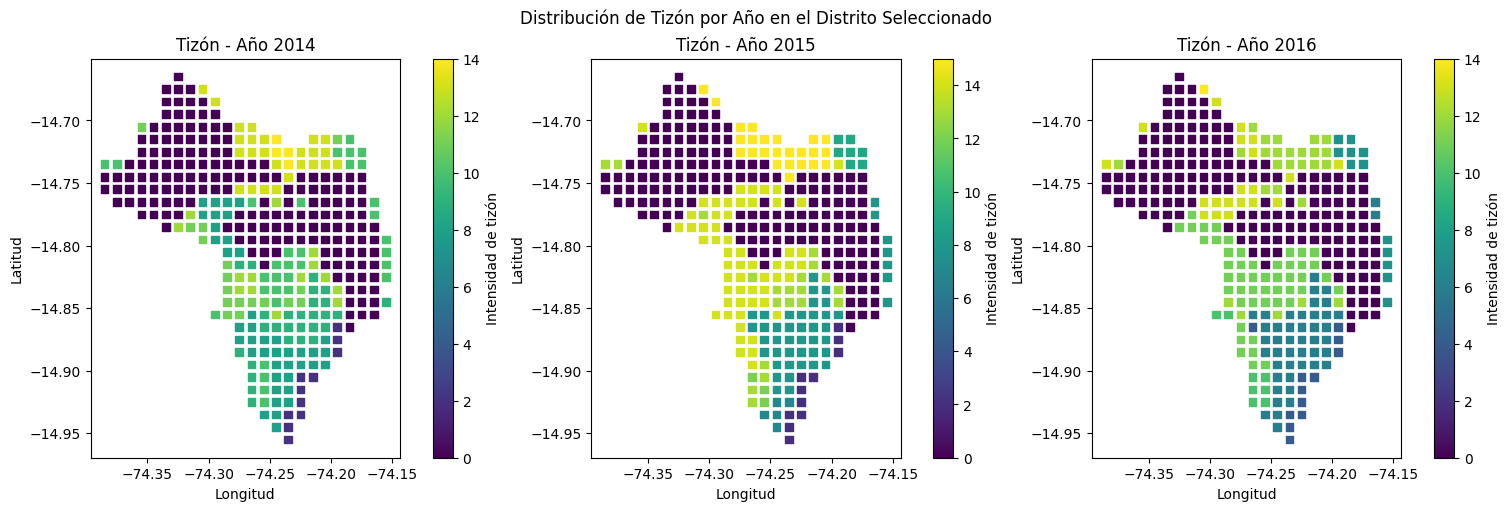

In [37]:
import matplotlib.pyplot as plt

# Extraer los valores de cada año y asignar 0 a las celdas con NODATA_value
tizon_distrito_2014 = np.where(tizon_2014[mask] == NODATA_value, 0, tizon_2014[mask])
tizon_distrito_2015 = np.where(tizon_2015[mask] == NODATA_value, 0, tizon_2015[mask])
tizon_distrito_2016 = np.where(tizon_2016[mask] == NODATA_value, 0, tizon_2016[mask])

# Coordenadas de las celdas dentro del distrito
coords_y, coords_x = np.where(mask)

# Generar tres mapas individuales
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Mapa 2014
sc1 = axs[0].scatter(
    lon_grid[coords_y, coords_x], lat_grid[coords_y, coords_x],
    c=tizon_distrito_2014, cmap='viridis', marker='s', s=30
)
axs[0].set_title("Tizón - Año 2014")
axs[0].set_xlabel("Longitud")
axs[0].set_ylabel("Latitud")
plt.colorbar(sc1, ax=axs[0], label="Intensidad de tizón")

# Mapa 2015
sc2 = axs[1].scatter(
    lon_grid[coords_y, coords_x], lat_grid[coords_y, coords_x],
    c=tizon_distrito_2015, cmap='viridis', marker='s', s=30
)
axs[1].set_title("Tizón - Año 2015")
axs[1].set_xlabel("Longitud")
axs[1].set_ylabel("Latitud")
plt.colorbar(sc2, ax=axs[1], label="Intensidad de tizón")

# Mapa 2016
sc3 = axs[2].scatter(
    lon_grid[coords_y, coords_x], lat_grid[coords_y, coords_x],
    c=tizon_distrito_2016, cmap='viridis', marker='s', s=30
)
axs[2].set_title("Tizón - Año 2016")
axs[2].set_xlabel("Longitud")
axs[2].set_ylabel("Latitud")
plt.colorbar(sc3, ax=axs[2], label="Intensidad de tizón")

# Mostrar los mapas
plt.suptitle("Distribución de Tizón por Año en el Distrito Seleccionado")
plt.show()


In [39]:
from tqdm import tqdm
import pandas as pd
import numpy as np

# Crear un DataFrame vacío para almacenar los resultados
resultados_consolidados = []

# Iterar sobre cada distrito en el GeoJSON con una barra de progreso
with tqdm(total=len(distritos), desc="Procesando distritos") as pbar:
    for idx, row in distritos.iterrows():
        # Extraer la geometría del distrito
        geometria = row['geometry']

        # Crear la máscara para identificar las celdas dentro del distrito
        mask = contains(geometria, lon_grid, lat_grid)

        # Calcular los valores de tizón considerando NODATA_value como 0
        tizon_2014_distrito = np.where(tizon_2014[mask] == NODATA_value, 0, tizon_2014[mask])
        tizon_2015_distrito = np.where(tizon_2015[mask] == NODATA_value, 0, tizon_2015[mask])
        tizon_2016_distrito = np.where(tizon_2016[mask] == NODATA_value, 0, tizon_2016[mask])

        # Calcular indicadores basados en la suma de intensidades
        indicador_2014 = np.sum(tizon_2014_distrito)
        indicador_2015 = np.sum(tizon_2015_distrito)
        indicador_2016 = np.sum(tizon_2016_distrito)

        # Calcular porcentaje solo si hay celdas válidas y np.max no es 0
        total_celdas = np.sum(mask)
        porcentaje_2014 = (indicador_2014 / (total_celdas * np.max(tizon_2014_distrito))) * 100 if total_celdas > 0 and np.max(tizon_2014_distrito) > 0 else 0
        porcentaje_2015 = (indicador_2015 / (total_celdas * np.max(tizon_2015_distrito))) * 100 if total_celdas > 0 and np.max(tizon_2015_distrito) > 0 else 0
        porcentaje_2016 = (indicador_2016 / (total_celdas * np.max(tizon_2016_distrito))) * 100 if total_celdas > 0 and np.max(tizon_2016_distrito) > 0 else 0

        # Agregar los resultados a la lista
        resultados_consolidados.append({
            'Departamento': row['nombdep'],
            'Provincia': row['nombprov'],
            'Distrito': row['nombdist'],
            '2014': porcentaje_2014,
            '2015': porcentaje_2015,
            '2016': porcentaje_2016
        })

        # Actualizar la barra de progreso
        pbar.update(1)

# Convertir los resultados en un DataFrame
df_resultados_consolidados = pd.DataFrame(resultados_consolidados)

# Mostrar los primeros resultados
print(df_resultados_consolidados.head())

# Guardar la tabla en un archivo CSV
df_resultados_consolidados.to_csv('/content/consolidado_tizon_distritos.csv', index=False)
print("Resultados consolidados guardados en consolidado_tizon_distritos.csv")


Procesando distritos: 100%|██████████| 1875/1875 [05:43<00:00,  5.46it/s]

  Departamento  Provincia  Distrito       2014       2015       2016
0    CAJAMARCA  CONTUMAZA  GUZMANGO  74.218750  70.937500  61.562500
1    CAJAMARCA  SAN PABLO  SAN LUIS  32.549020  28.039216  27.731092
2   LAMBAYEQUE   CHICLAYO   LAGUNAS   0.000000   0.000000   0.000000
3   LAMBAYEQUE   CHICLAYO   MONSEFU   0.000000   0.000000   0.000000
4   LAMBAYEQUE   CHICLAYO   CAYALTI   2.238806   2.238806   2.238806
Resultados consolidados guardados en consolidado_tizon_distritos.csv


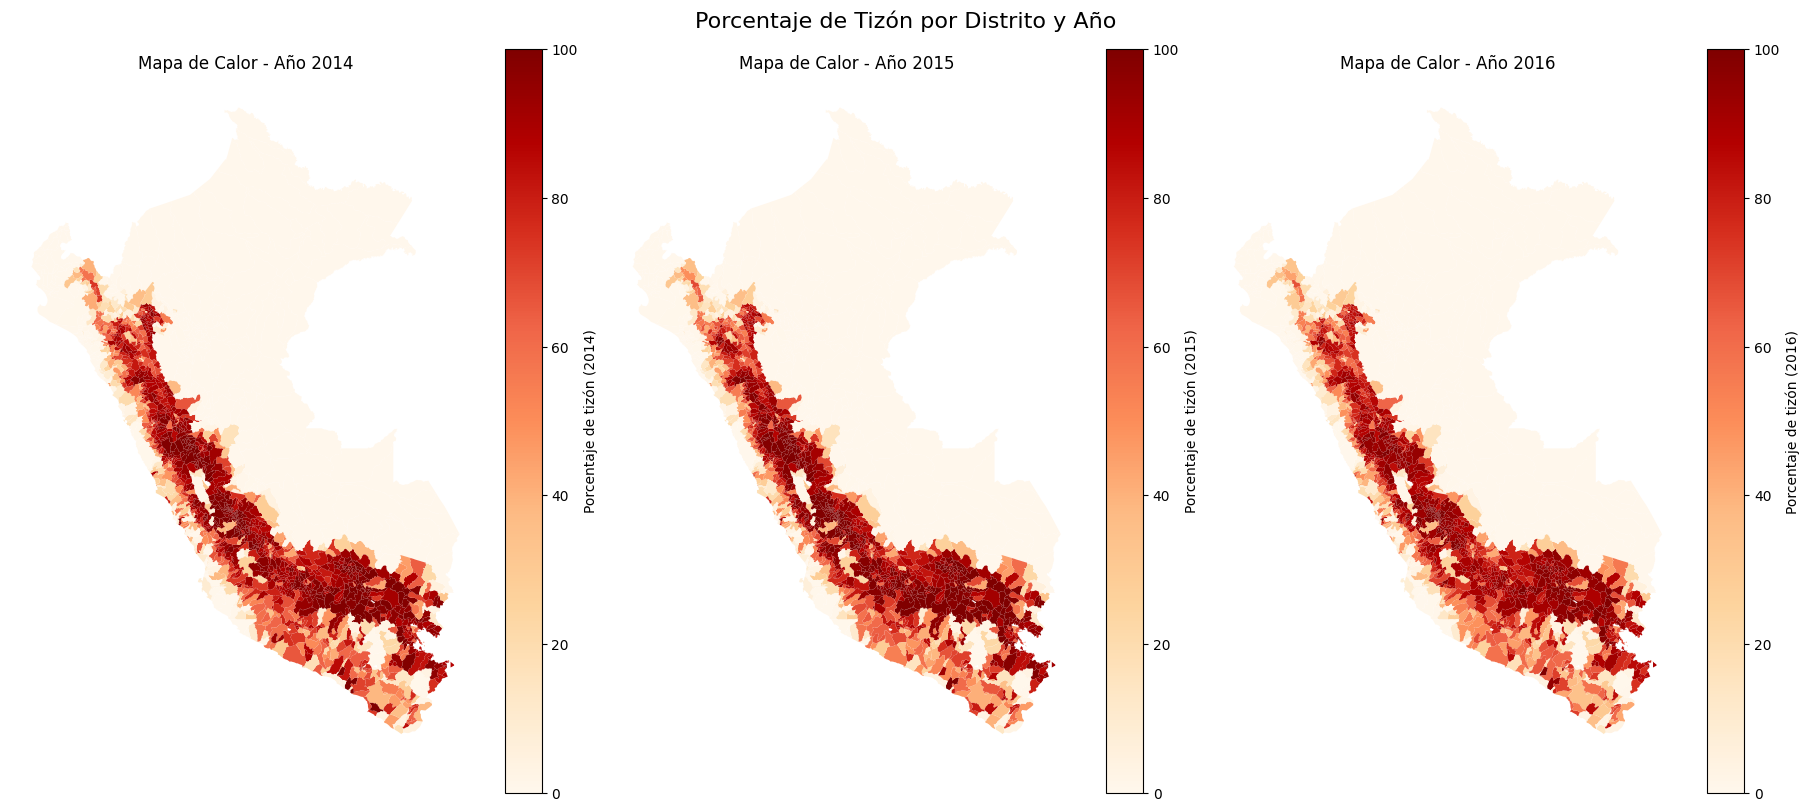

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Combinar los resultados consolidados con el GeoDataFrame de distritos
distritos_consolidado = distritos.merge(df_resultados_consolidados,
                                        left_on=['nombdep', 'nombprov', 'nombdist'],
                                        right_on=['Departamento', 'Provincia', 'Distrito'],
                                        how='left')

# Crear el gráfico con 3 subplots para los años
fig, axs = plt.subplots(1, 3, figsize=(18, 8), constrained_layout=True)

# Año 2014
distritos_consolidado.plot(
    column='2014', cmap='OrRd', legend=True, ax=axs[0],
    legend_kwds={'label': "Porcentaje de tizón (2014)"}
)
axs[0].set_title("Mapa de Calor - Año 2014")
axs[0].set_axis_off()

# Año 2015
distritos_consolidado.plot(
    column='2015', cmap='OrRd', legend=True, ax=axs[1],
    legend_kwds={'label': "Porcentaje de tizón (2015)"}
)
axs[1].set_title("Mapa de Calor - Año 2015")
axs[1].set_axis_off()

# Año 2016
distritos_consolidado.plot(
    column='2016', cmap='OrRd', legend=True, ax=axs[2],
    legend_kwds={'label': "Porcentaje de tizón (2016)"}
)
axs[2].set_title("Mapa de Calor - Año 2016")
axs[2].set_axis_off()

# Mostrar el gráfico
plt.suptitle("Porcentaje de Tizón por Distrito y Año", fontsize=16)
plt.show()


In [42]:
df_resultados_consolidados

,Departamento,Provincia,Distrito,2014,2015,2016
0,CAJAMARCA,CONTUMAZA,GUZMANGO,74.218750,70.937500,61.562500
1,CAJAMARCA,SAN PABLO,SAN LUIS,32.549020,28.039216,27.731092
2,LAMBAYEQUE,CHICLAYO,LAGUNAS,0.000000,0.000000,0.000000
3,LAMBAYEQUE,CHICLAYO,MONSEFU,0.000000,0.000000,0.000000
4,LAMBAYEQUE,CHICLAYO,CAYALTI,2.238806,2.238806,2.238806
...,...,...,...,...,...,...
1870,AMAZONAS,BONGARA,YAMBRASBAMBA,29.619169,27.815233,24.653790
1871,AMAZONAS,UTCUBAMBA,YAMON,6.212205,5.882353,6.355140
1872,AREQUIPA,CASTILLA,ANDAGUA,78.879724,92.768080,80.571299
1873,AREQUIPA,CASTILLA,CHOCO,32.680429,38.144777,32.686234


In [41]:
# 3. Resumen general del DataFrame
print("\n------------------------Información general del DataFrame:------------------------")
df_resultados_consolidados.info()

# 7. Contar valores nulos por columna
print("\n------------------------Conteo de valores nulos y ceros:------------------------")
print((df_resultados_consolidados.isnull() | (df_resultados_consolidados == 0)).sum())

# Calcular el porcentaje de filas con valores diferentes en los 3 años
diferentes_3_anios = df_resultados_consolidados[
    (df_resultados_consolidados['2014'] != df_resultados_consolidados['2015']) &
    (df_resultados_consolidados['2014'] != df_resultados_consolidados['2016']) &
    (df_resultados_consolidados['2015'] != df_resultados_consolidados['2016'])
]

# Calcular el porcentaje
porcentaje_diferentes = (len(diferentes_3_anios) / len(df_resultados_consolidados)) * 100

print(f"Porcentaje de filas con valores diferentes en los 3 años: {porcentaje_diferentes:.2f}%")



------------------------Información general del DataFrame:------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  1875 non-null   object 
 1   Provincia     1875 non-null   object 
 2   Distrito      1875 non-null   object 
 3   2014          1875 non-null   float64
 4   2015          1875 non-null   float64
 5   2016          1875 non-null   float64
dtypes: float64(3), object(3)
memory usage: 88.0+ KB

------------------------Conteo de valores nulos y ceros:------------------------
Departamento      0
Provincia         0
Distrito          0
2014            323
2015            323
2016            323
dtype: int64
Porcentaje de filas con valores diferentes en los 3 años: 67.73%
